In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

from keras import backend as K
from keras import initializers
from keras import layers
from keras import models
from keras import optimizers
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping, TensorBoard
from keras.losses import binary_crossentropy
from keras.models import model_from_json

json_file = open('../weights/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("../weights/model.h5")
print("[INFO] Loaded model from disk")

image = cv2.imread('../dataset/val/input/2007_000032.jpg') * 1./255
image = cv2.resize(image, (320,320), cv2.INTER_NEAREST)

# # shape_ = (test_image.shape[0], test_image.shape[1])
# # test_image = cv2.resize(test_image, (480, 480))

batch = np.expand_dims(image, axis=0)
label = loaded_model.predict(batch, 1)[0]


# # image_pred = K.variable(label)
# # true_image = cv2.imread(
# #     'datasets/HUMANS/train/segmented/2007_001430.png', 0) * 1.
# # true_image = cv2.resize(true_image, (480, 480))
# # true_image2 = true_image * 255
# # true_image = np.expand_dims(true_image, axis=2)
# # true_image = K.variable(true_image)

# #loss = binary_crossentropy(true_image, image_pred)
# print("[INFO] Segmentation predicted")
# #a = K.eval(loss)
# #print(a)

# label = cv2.resize(label, shape_) * 255
# #_, label = cv2.threshold(label, 128, 255, cv2.THRESH_BINARY)
# #plt.imshow(label, cmap='gray')
# #plt.imshow(true_image2, cmap='gray')
# #plt.show()
# cv2.imwrite('test2.jpg', label)




Using TensorFlow backend.


[INFO] Loaded model from disk


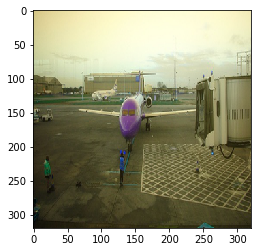

In [2]:
plt.imshow(image)

In [19]:
label.shape

(102400, 21)

In [3]:
aeroplane = label.reshape((320,320,21))

In [4]:
aeroplane.shape

(320, 320, 21)

In [5]:
t = np.argmax(aeroplane, axis=2)

In [10]:
t.shape

(320, 320)

In [17]:
c = t == 0

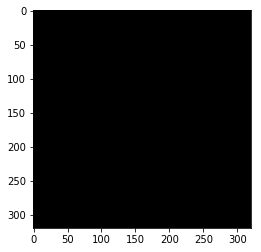

In [18]:
plt.imshow(c, cmap='gray')

In [64]:
from PIL import Image
from keras.utils import np_utils

In [123]:
def data_gen(images_dir, labels_dir, nb_classes=21, batch_size=8, image_size=(320, 320)):
    """
    Generator to yield batches of two inputs (per sample) with shapes top_dim and 
    bot_dim along with their labels.
    """
    images = glob.glob(os.path.join(images_dir, '*.jpg'))
    data_size = len(images)
    i = 0

    while True:
        top_batch = []
        batch_labels = []

        for _ in range(batch_size):
            # Input
            image = cv2.imread(images[i]) * 1./255
            image = cv2.resize(image, image_size, cv2.INTER_NEAREST)

            # Label
            label_file = os.path.join(labels_dir, os.path.splitext(os.path.basename(images[i]))[0] + '.png')
            Y = np.array(Image.open(label_file))
            Y[Y == 255] = 0
            Y = np_utils.to_categorical(Y, nb_classes)
            Y = cv2.resize(Y, image_size)
            label = Y.reshape(image_size[0] * image_size[1], nb_classes).astype(np.int8)
    
            top_batch.append(image)
            batch_labels.append(label)

            i += 1

            if i >= data_size:
                # Shuffle??
                i = 0

        yield np.array(top_batch), np.array(batch_labels)

In [124]:
train_validation = data_gen('../dataset/train/input/', '../dataset/train/segments/')

float32 int8
float32 int8
float32 int8
float32 int8
float32 int8
float32 int8
float32 int8
float32 int8


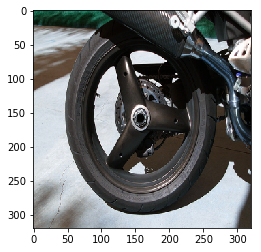

In [125]:
for a, b in train_validation:
    t = b[0].reshape((320,320,21))
    
    t0 = t[:,:,0]
    t1 = t[:,:,1]
    t2 = t[:,:,2]
    t3 = t[:,:,3]
    t4 = t[:,:,4]
    t5 = t[:,:,5]
    t6 = t[:,:,6]
    t7 = t[:,:,7]
    t8 = t[:,:,8]
    t9 = t[:,:,9]
    t10 = t[:,:,10]
    t11 = t[:,:,11]
    t12 = t[:,:,12]
    t13 = t[:,:,13]
    t14 = t[:,:,14]
    
    plt.imshow(a[0])

    break

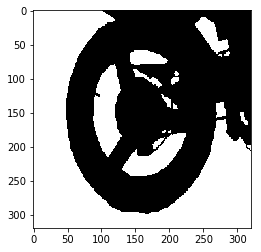

In [122]:
plt.imshow(t0, cmap='gray')

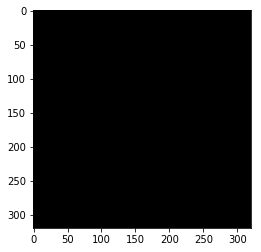

In [126]:
plt.imshow(t1, cmap='gray')

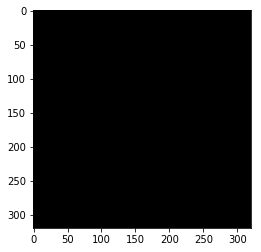

In [127]:
plt.imshow(t2, cmap='gray')

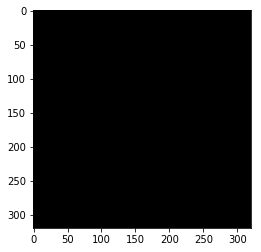

In [128]:
plt.imshow(t3, cmap='gray')

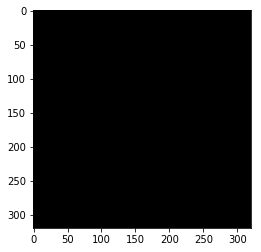

In [129]:
plt.imshow(t4, cmap='gray')

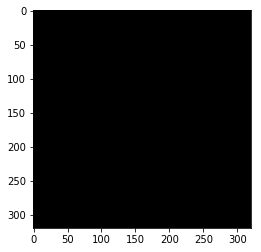

In [130]:
plt.imshow(t5, cmap='gray')

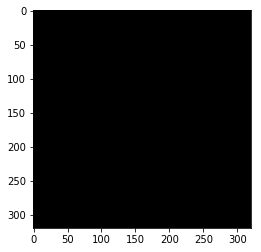

In [131]:
plt.imshow(t6, cmap='gray')

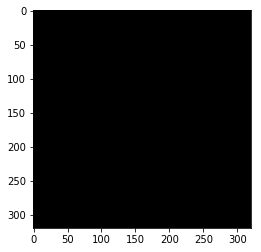

In [132]:
plt.imshow(t7, cmap='gray')

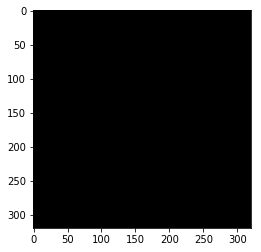

In [133]:
plt.imshow(t8, cmap='gray')

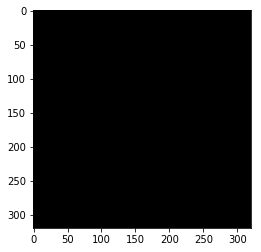

In [134]:
plt.imshow(t9, cmap='gray')

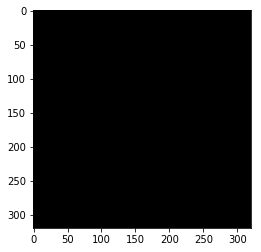

In [135]:
plt.imshow(t10, cmap='gray')

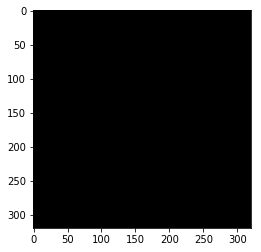

In [136]:
plt.imshow(t11, cmap='gray')

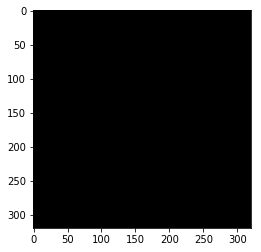

In [137]:
plt.imshow(t12, cmap='gray')

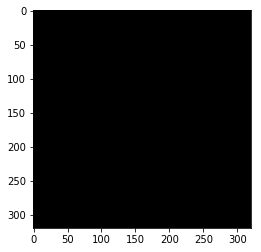

In [138]:
plt.imshow(t13, cmap='gray')

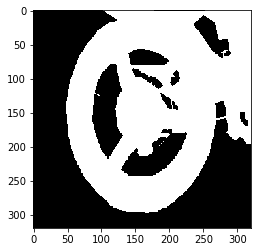

In [139]:
plt.imshow(t14, cmap='gray')